In [1]:
import os
import librosa
import soundfile as sf
import pandas as pd
import numpy as np

# Define input and output paths
input_folder = '/Users/aayush./Desktop/FRONTERA/donateacry_corpus'
output_folder = '/Users/aayush./Desktop/FRONTERA/cry_processed'
os.makedirs(output_folder, exist_ok=True)

# Sampling rate and bit depth
target_sr = 16000  # 16kHz sampling rate
frame_length = int(0.975 * target_sr)  # 0.975 seconds for YAMNet

# Prepare labels list
data = []

# Function to process audio files
def preprocess_audio(file_path, output_path, label='crying'):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=target_sr, mono=True)
    
    # Normalize audio to [-1, 1] range
    audio = audio / np.max(np.abs(audio))
    
    # Split into 0.975s frames or pad if shorter
    num_frames = int(np.ceil(len(audio) / frame_length))
    for i in range(num_frames):
        start = i * frame_length
        end = start + frame_length
        frame = audio[start:end]
        
        # Pad with zeros if frame is shorter than 0.975s
        if len(frame) < frame_length:
            frame = np.pad(frame, (0, frame_length - len(frame)))
        
        # Save each frame
        frame_output_path = f"{output_path.replace('.wav', '')}_frame_{i}.wav"
        sf.write(frame_output_path, frame, target_sr)
        
        # Append file and label
        data.append({'file': frame_output_path, 'label': label})

# Traverse folders and process files
for root, _, files in os.walk(input_folder):
    for file in files:
        if file.endswith('.wav'):
            input_file = os.path.join(root, file)
            output_file = os.path.join(output_folder, file)
            preprocess_audio(input_file, output_file)

# Save labels to CSV
labels_df = pd.DataFrame(data)
labels_df.to_csv(os.path.join(output_folder, 'labels.csv'), index=False)

print(f"Preprocessing complete! Files saved in {output_folder}")


Preprocessing complete! Files saved in /Users/aayush./Desktop/FRONTERA/cry_processed


In [2]:
import os
import librosa
import soundfile as sf
import pandas as pd
import numpy as np

# Define input and output paths
input_folder = '/Users/aayush./Desktop/FRONTERA/archive-3'
scream_output_folder = '/Users/aayush./Desktop/FRONTERA/scream_processed'
normal_output_folder = '/Users/aayush./Desktop/FRONTERA/normal_processed'
os.makedirs(scream_output_folder, exist_ok=True)
os.makedirs(normal_output_folder, exist_ok=True)

# Sampling rate and bit depth
target_sr = 16000  # 16kHz sampling rate
frame_length = int(0.975 * target_sr)  # Frame length for YAMNet

# Prepare labels list
data = []

# Function to process audio files
def preprocess_audio(file_path, output_path, label):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=target_sr, mono=True)
    
    # Normalize audio
    audio = audio / np.max(np.abs(audio))

    # Frame segmentation for YAMNet
    num_frames = len(audio) // frame_length
    for i in range(num_frames):
        start = i * frame_length
        end = start + frame_length
        frame = audio[start:end]
        frame_output_path = f"{output_path.replace('.wav', '')}_frame_{i}.wav"
        sf.write(frame_output_path, frame, target_sr)
        data.append({'file': frame_output_path, 'label': label})

# Traverse only Screaming and NotScreaming folders
screaming_folder = os.path.join(input_folder, 'Screaming')
notscreaming_folder = os.path.join(input_folder, 'NotScreaming')

for file in os.listdir(screaming_folder):
    if file.endswith('.wav'):
        input_file = os.path.join(screaming_folder, file)
        output_file = os.path.join(scream_output_folder, file)
        preprocess_audio(input_file, output_file, 'screaming')

for file in os.listdir(notscreaming_folder):
    if file.endswith('.wav'):
        input_file = os.path.join(notscreaming_folder, file)
        output_file = os.path.join(normal_output_folder, file)
        preprocess_audio(input_file, output_file, 'normal')

# Append labels to existing CSV
labels_csv_path = '/Users/aayush./Desktop/FRONTERA/cry_processed/labels.csv'
if os.path.exists(labels_csv_path):
    existing_labels_df = pd.read_csv(labels_csv_path)
    labels_df = pd.DataFrame(data)
    combined_labels_df = pd.concat([existing_labels_df, labels_df], ignore_index=True)
    combined_labels_df.to_csv(labels_csv_path, index=False)
else:
    labels_df = pd.DataFrame(data)
    labels_df.to_csv(labels_csv_path, index=False)

print(f"Preprocessing complete!\nProcessed screaming files: {len(os.listdir(scream_output_folder))}\nProcessed normal files: {len(os.listdir(normal_output_folder))}\nLabels saved to: {labels_csv_path}")


Preprocessing complete!
Processed screaming files: 8338
Processed normal files: 25996
Labels saved to: /Users/aayush./Desktop/FRONTERA/cry_processed/labels.csv


Epoch 1/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 129s 152ms/step - accuracy: 0.7995 - loss: 0.5261 - val_accuracy: 0.8340 - val_loss: 0.4042
Epoch 2/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 129s 156ms/step - accuracy: 0.8364 - loss: 0.4031 - val_accuracy: 0.8401 - val_loss: 0.3880
Epoch 3/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 130s 157ms/step - accuracy: 0.8421 - loss: 0.3891 - val_accuracy: 0.8403 - val_loss: 0.3838
Epoch 4/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 122s 147ms/step - accuracy: 0.8391 - loss: 0.3817 - val_accuracy: 0.8479 - val_loss: 0.3821
Epoch 5/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 128s 154ms/step - accuracy: 0.8460 - loss: 0.3688 - val_accuracy: 0.8481 - val_loss: 0.3800
Epoch 6/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 128s 154ms/step - accuracy: 0.8503 - loss: 0.3604 - val_accuracy: 0.8474 - val_loss: 0.3800
Epoch 7/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 127s 153ms/step - accuracy: 0.8532 - loss: 0.3513 - val_accuracy: 0.8497 - val_loss: 0.3735
Epoch 8/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 128s 154ms/step - accuracy: 0.8589 -

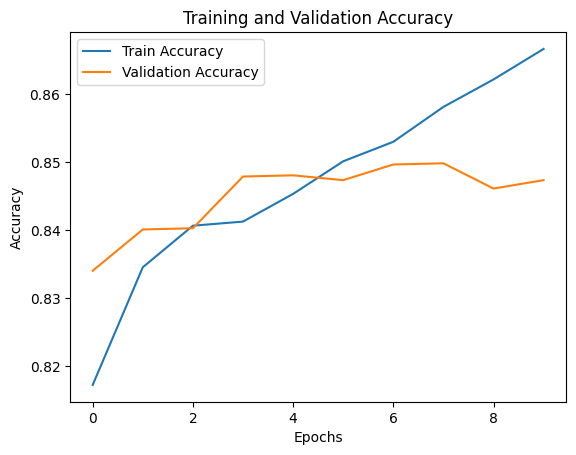

In [23]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks

# Load labels and prepare dataset
labels_df = pd.read_csv('/Users/aayush./Desktop/FRONTERA/cry_processed/labels.csv')
file_paths = labels_df['file'].tolist()
labels = labels_df['label'].tolist()

# Map labels to integers
label_map = {'crying': 0, 'screaming': 1, 'normal': 2}
labels = np.array([label_map[label] for label in labels])

# Train-validation-test split
train_paths, temp_paths, train_labels, temp_labels = train_test_split(file_paths, labels, test_size=0.3, stratify=labels, random_state=42)
val_paths, test_paths, val_labels, test_labels = train_test_split(temp_paths, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

# Data loading function
# Data loading function with padding or trimming
def load_audio(file_path, target_sr=16000, target_length=16000):
    audio, _ = librosa.load(file_path, sr=target_sr, mono=True)
    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)))
    else:
        audio = audio[:target_length]
    return audio

# Ensure correct input shape for YAMNet
def data_generator(file_paths, labels, batch_size=32):
    while True:
        for i in range(0, len(file_paths), batch_size):
            batch_paths = file_paths[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]
            batch_audio = np.array([load_audio(fp) for fp in batch_paths])
            batch_audio = batch_audio[..., np.newaxis]  # Add channel dim: (batch_size, 16000) -> (batch_size, 16000, 1)
            yield batch_audio, np.array(batch_labels)



# Load YAMNet model
yamnet_model = hub.load('https://tfhub.dev/google/yamnet/1')

# YAMNet embedding layer
# YAMNet embedding layer
from  tensorflow.keras import layers
@tf.keras.utils.register_keras_serializable()
class YamnetEmbedding(layers.Layer):
    def __init__(self, yamnet_model, **kwargs):
        super(YamnetEmbedding, self).__init__(**kwargs)
        self.yamnet = yamnet_model

    def call(self, inputs):
        waveform = tf.squeeze(inputs, axis=-1)
        embeddings = tf.map_fn(lambda w: self.yamnet(w)[1], waveform)
        return embeddings

    def get_config(self):
        config = super().get_config()
        return config


# Define the model
input_tensor = layers.Input(shape=(16000, 1))
embedding_layer = YamnetEmbedding(yamnet_model)(input_tensor)
x = layers.GlobalAveragePooling1D()(embedding_layer)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output_tensor = layers.Dense(3, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    data_generator(train_paths, train_labels),
    steps_per_epoch=len(train_paths)//32,
    validation_data=data_generator(val_paths, val_labels),
    validation_steps=len(val_paths)//32,
    epochs=10,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(data_generator(test_paths, test_labels), steps=len(test_paths)//32)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
#model.save('/Users/aayush./Desktop/FRONTERA/yamnet_finetuned_model', save_format='tf')
# Save the trained model
model.save('/Users/aayush./Desktop/FRONTERA/yamnet_finetuned_model.keras')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

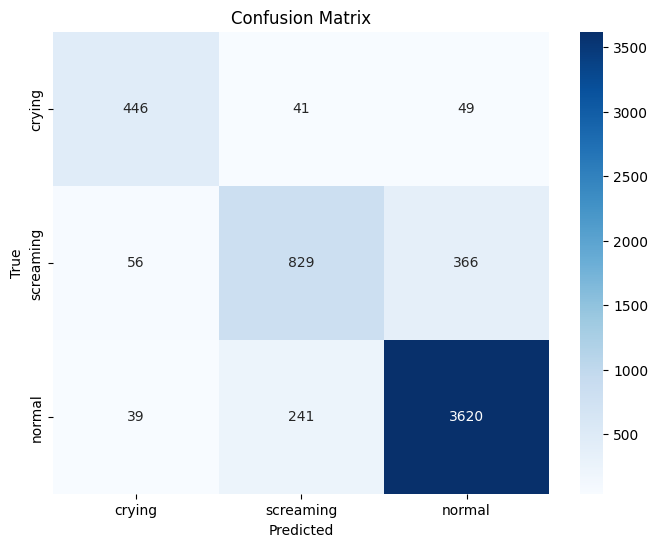

Classification Report:
              precision    recall  f1-score   support

      crying       0.82      0.83      0.83       536
   screaming       0.75      0.66      0.70      1251
      normal       0.90      0.93      0.91      3900

    accuracy                           0.86      5687
   macro avg       0.82      0.81      0.81      5687
weighted avg       0.86      0.86      0.86      5687



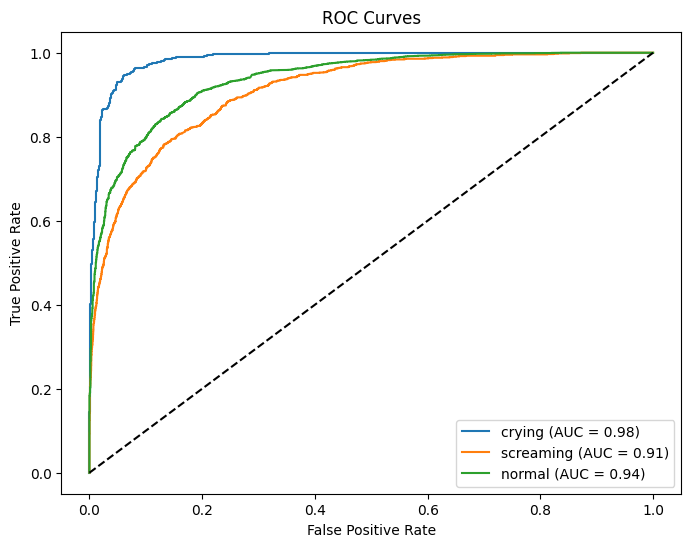

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Get true and predicted labels
y_true = []
y_pred = []
y_prob = []

for batch_audio, batch_labels in data_generator(test_paths, test_labels, batch_size=32):
    preds = model.predict(batch_audio)
    y_prob.extend(preds)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(batch_labels)
    if len(y_true) >= len(test_labels):
        break

y_true = np.array(y_true[:len(test_labels)])
y_pred = np.array(y_pred[:len(test_labels)])
y_prob = np.array(y_prob[:len(test_labels)])

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=label_map.keys()))

# ROC curves
plt.figure(figsize=(8, 6))
for i, label in enumerate(label_map.keys()):
    fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()
